# **Linked Data Analytics Example**

Hands-On Data Analytics example for lecture 6.3/6.4, Knowledge Mining and Information Extraction II/III

In [0]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import scipy as scp
import os

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


First, we are going to read in the data. In the example, we are reading from a GoogleDoc spreadsheet. Therefore, we first have to **authenticate with Google Docs**...

In [0]:
#Prepare to read Data from Google Sheets
!pip install --upgrade -q gspread

In [0]:
4/AAAaHX1EgBzaUoBypi0nqnx3yQ6AsNUbcA-BLRKkyIz7Jhc1cos_2cA#Authenticate with Google Sheets
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

We are **reading the data** into a comfortable data stracture (pandas).([Read the python documentation to learn more about the datastructure](http://pandas.pydata.org/pandas-docs/version/0.15/10min.html)). The usage here is more or less straight forward.

In [5]:
#Read Google Spreadsheet as CSV into pandas DataFrame
import pandas as pd
goals = pd.read_csv('https://docs.google.com/spreadsheets/d/' + '1lBfpfTSMU1RZtAg8UcWpXFH-TOtPUgZVDt5-mHmhZsk' +
                   '/export?gid=1959724960&format=csv'
                  )
goals.head(10) 

,total_goals,height,weight,year,pos,bday
0,0,208.0,110.0,1987,goalkeeper,1987-02-09
1,0,205.0,97.0,1977,goalkeeper,1977-07-21
2,134,204.0,95.0,1977,forward,1977-03-20
3,56,204.0,85.0,1990,forward,1990-02-02
4,11,204.0,102.0,1987,defender,1987-01-28
5,0,204.0,87.0,1991,goalkeeper,1991-08-02
6,57,203.0,95.0,1983,forward,1983-10-28
7,51,203.0,87.0,1990,forward,1990-05-20
8,255,202.0,108.0,1973,forward,1973-03-30
9,232,202.0,95.0,1980,forward,1980-09-25


First, let's **get some insights about our data**. 

In [6]:
goals.describe()

,total_goals,height,weight,year
count,24484.000000,24484.000000,24484.000000,24484.000000
mean,34.717571,180.400302,75.029877,1978.552034
std,57.317872,6.772813,6.992918,16.599536
min,0.000000,134.000000,26.000000,1900.000000
25%,4.000000,176.000000,70.000000,1975.000000
50%,15.000000,180.000000,75.000000,1984.000000
75%,42.000000,185.000000,80.000000,1989.000000
max,1859.000000,208.000000,134.000000,2001.000000


Let's have a look on the distribution of the numerical data via **histogram plots**.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ae74657d0>,
      dtype=object)

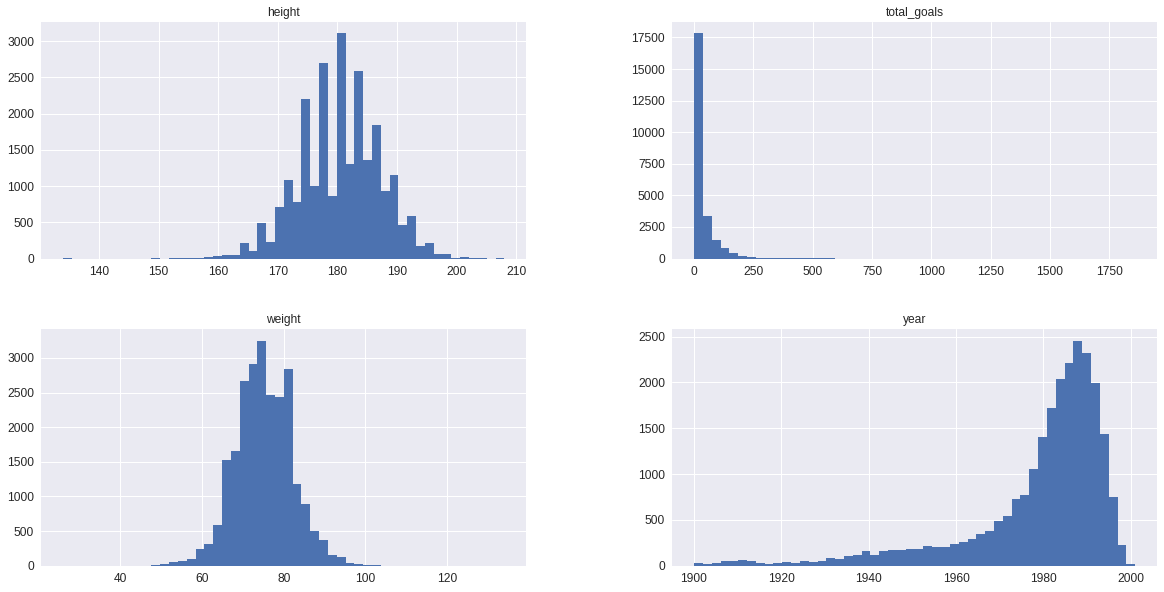

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
goals.hist(bins=50, figsize=(20,10))

**Boxplots** are visualizing the numbers that we have already inspected (via 'describe')

![alt text](https://lh6.googleusercontent.com/Ig2feZt6ERNHKk4QYp_bFq3IsDGYr_ibceZVBoq0nmVPrZEFJ3SfZ4FZ5EbMhHmF-9mr_xi0nEOx9MGDR60u=w2854-h1560-rw)

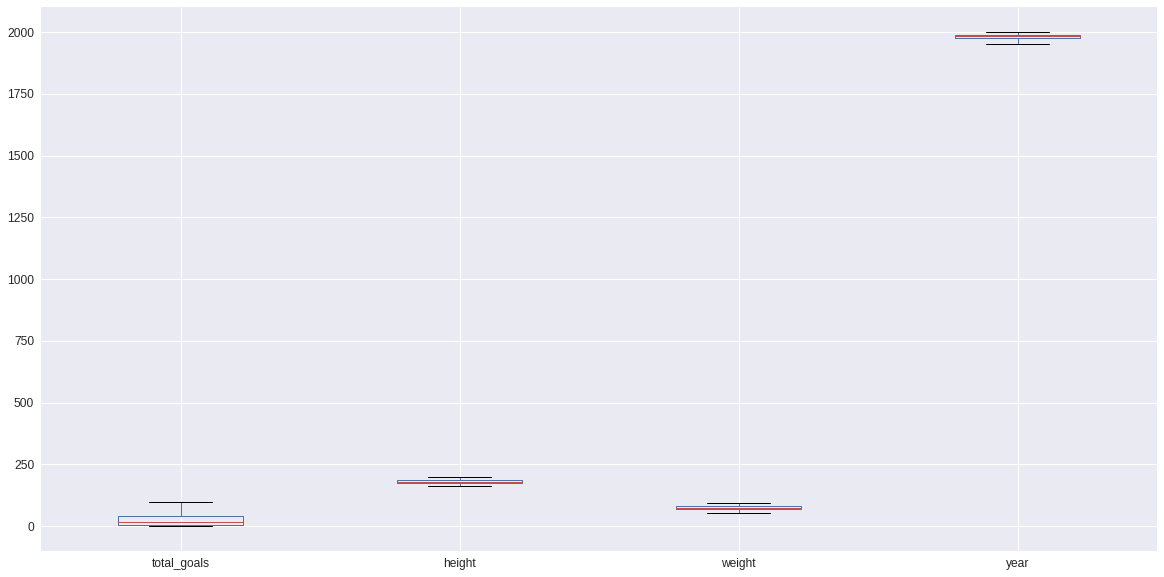

In [56]:
goals.boxplot(figsize=(20,10))

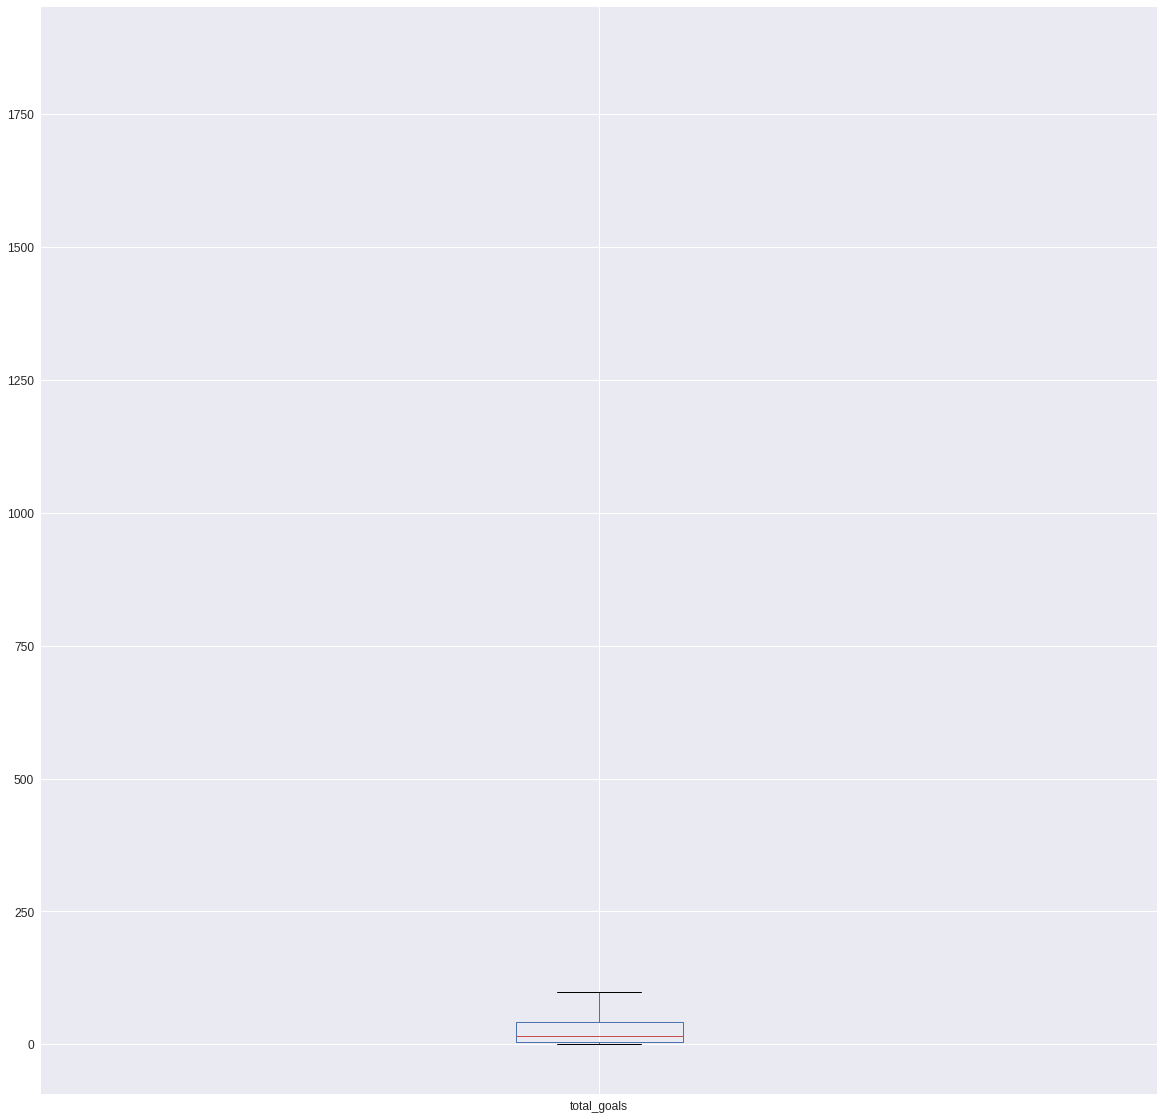

In [57]:
goals.boxplot(column='total_goals', figsize=(20,20))

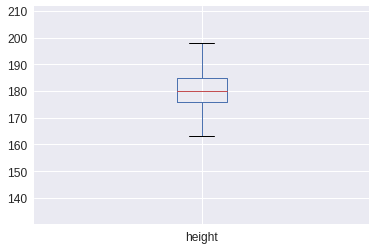

In [58]:
goals.boxplot('height')

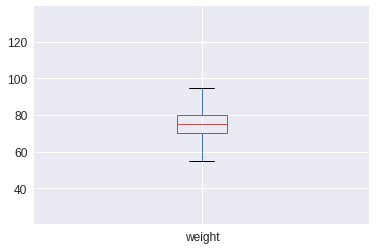

In [59]:
goals.boxplot('weight')

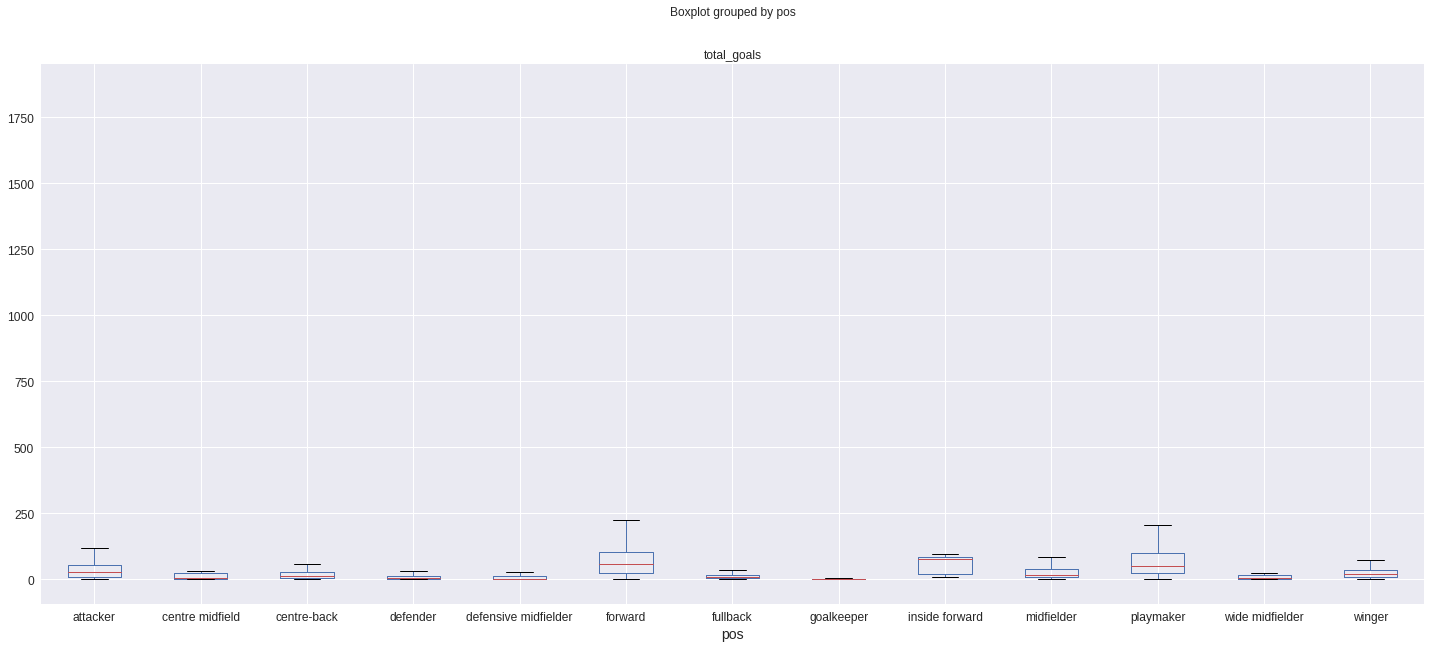

In [60]:
goals.boxplot(column='total_goals', by='pos',figsize=(24,10))

In [61]:
goals["pos"].value_counts()

midfielder              8524
defender                6225
forward                 5773
goalkeeper              2251
centre-back              696
fullback                 579
winger                   207
attacker                 196
wide midfielder           15
centre midfield            6
inside forward             5
playmaker                  4
defensive midfielder       3
Name: pos, dtype: int64

In [62]:
goals["year"].value_counts()

1988    1279
1989    1202
1987    1177
1986    1172
1990    1124
1985    1046
1984    1042
1991    1018
1983     999
1992     975
1981     868
1982     851
1993     794
1980     714
1979     695
1994     643
1977     531
1978     529
1995     476
1976     436
1974     386
1973     338
1975     335
1996     280
1971     278
1972     264
1969     247
1970     245
1968     207
1966     180
        ... 
1925      29
1929      27
1913      25
1922      24
1930      24
1926      23
1924      23
1928      23
1905      22
1914      22
1921      21
1927      21
1908      21
1920      20
1909      19
1915      16
1916      16
1919      16
1999      15
1923      13
1917      13
1904      13
1901      11
1906      10
1902      10
1918      10
1903       7
1900       6
2000       3
2001       2
Name: year, Length: 102, dtype: int64

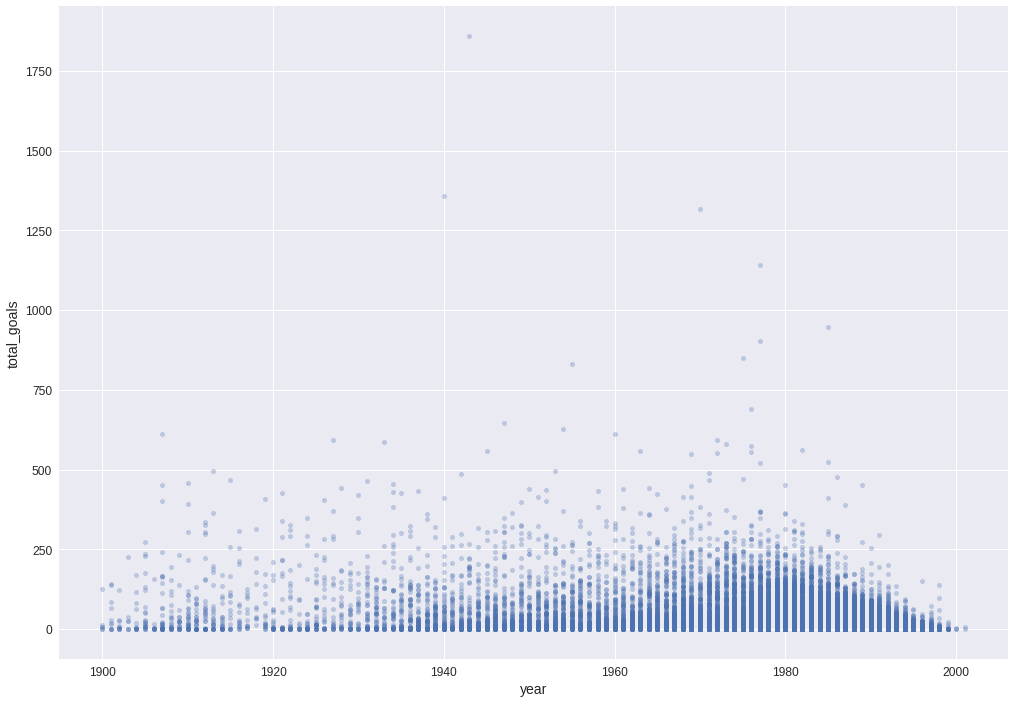

In [63]:
goals.plot(kind="scatter", x="year", y="total_goals", figsize=(17,12), alpha=0.3)

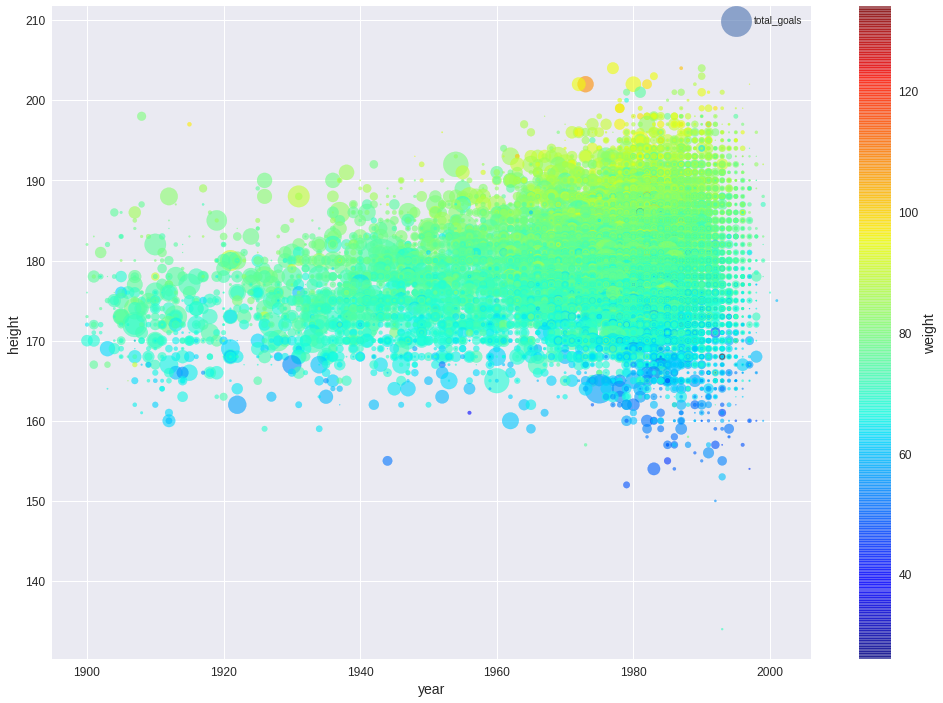

In [64]:
goals.plot(kind="scatter", x="year", y="height", figsize=(17,12), alpha=0.6,
          s=goals["total_goals"], label="total_goals",
          c="weight", cmap=plt.get_cmap("jet"), colorbar=True,
          sharex=False)

Now let's have a look, whether there is a corellation among the numerical data

In [65]:
corr_matrix = goals.corr()
corr_matrix["total_goals"].sort_values(ascending=False)

total_goals    1.000000
weight         0.002858
height        -0.071005
year          -0.242586
Name: total_goals, dtype: float64

In [66]:
goals_pos_encoded, goals_pos = goals["pos"].factorize()
goals_pos_encoded[:10]    #sample of first 10

array([0, 0, 1, 1, 2, 0, 1, 1, 1, 1])

In [67]:
goals_pos     # encoding

Index([u'goalkeeper', u'forward', u'defender', u'centre-back', u'midfielder',
       u'fullback', u'attacker', u'winger', u'centre midfield',
       u'wide midfielder', u'defensive midfielder', u'inside forward',
       u'playmaker'],
      dtype='object')

In [68]:
goals['pos_num']=goals_pos_encoded
goals.head(10)

,total_goals,height,weight,year,pos,bday,pos_num
0,0,208.0,110.0,1987,goalkeeper,1987-02-09,0
1,0,205.0,97.0,1977,goalkeeper,1977-07-21,0
2,134,204.0,95.0,1977,forward,1977-03-20,1
3,56,204.0,85.0,1990,forward,1990-02-02,1
4,11,204.0,102.0,1987,defender,1987-01-28,2
5,0,204.0,87.0,1991,goalkeeper,1991-08-02,0
6,57,203.0,95.0,1983,forward,1983-10-28,1
7,51,203.0,87.0,1990,forward,1990-05-20,1
8,255,202.0,108.0,1973,forward,1973-03-30,1
9,232,202.0,95.0,1980,forward,1980-09-25,1


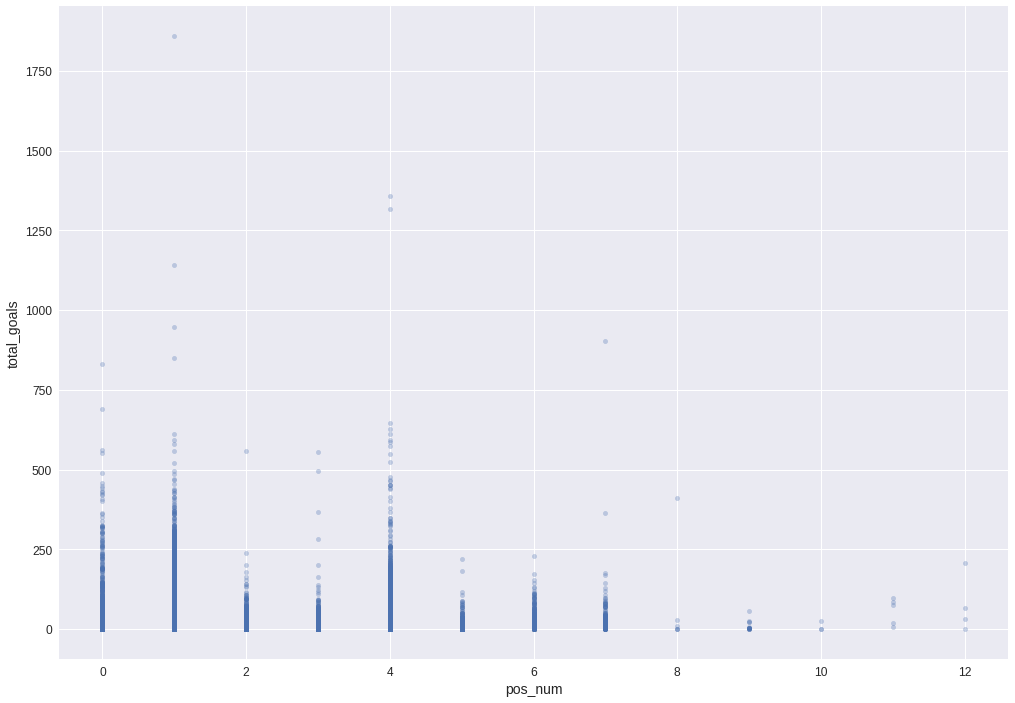

In [69]:
goals.plot(kind="scatter", x="pos_num", y="total_goals", figsize=(17,12), alpha=0.3)

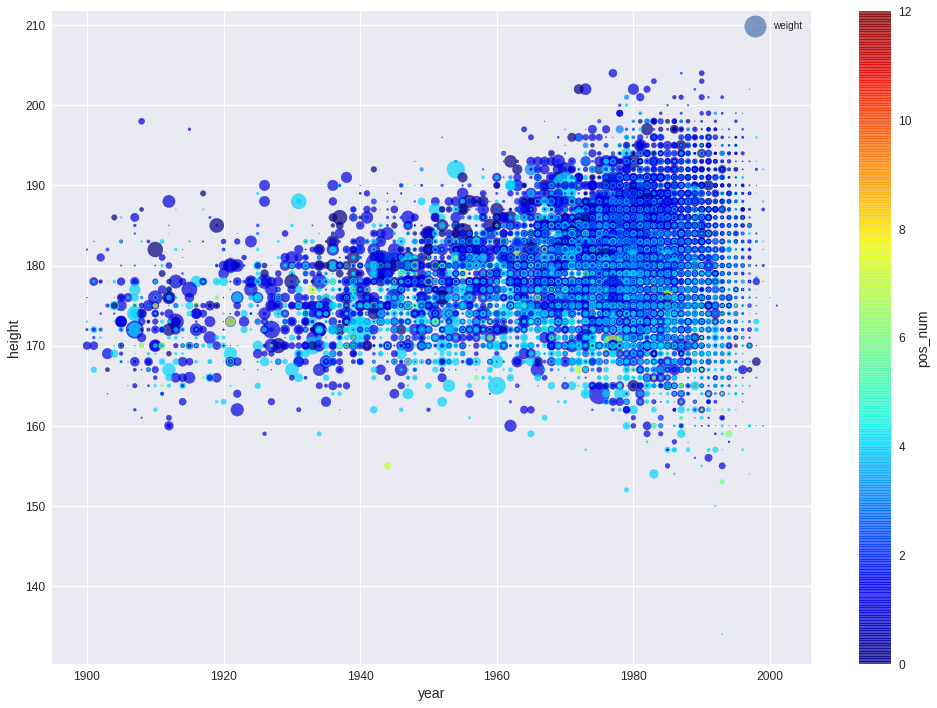

In [70]:
goals.plot(kind="scatter", x="year", y="height", figsize=(17,12), alpha=0.7,
          s=goals["total_goals"]/2, label="weight",
          c="pos_num", cmap=plt.get_cmap("jet"), colorbar=True,
          sharex=False)

In [71]:
goals_pos

Index([u'goalkeeper', u'forward', u'defender', u'centre-back', u'midfielder',
       u'fullback', u'attacker', u'winger', u'centre midfield',
       u'wide midfielder', u'defensive midfielder', u'inside forward',
       u'playmaker'],
      dtype='object')